In dieser Aufgabe sollen v.a. das Fourierspektrum sowie Auswirkungen von Bildänderungen auf das Spektrum näher untersucht werden.

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import rotate
from skimage.filters import gaussian

Erzeugt ein Bild, das 256x256 Pixel groß und komplett schwarz ist. Setzt den Bereich von `100:-100` auf der x-Achse und von `120:-120` auf der y-Achse auf 1. Welche geometrische Form wird entstehen?

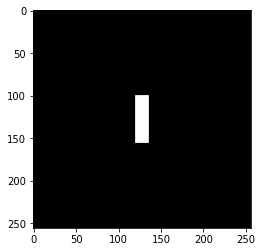

In [13]:
img = np.zeros((256,256))
img[100:-100,120:-120]=1

plt.imshow(img, cmap='gray', vmin=0, vmax=1)

Berechnet nun die 2D DFT, zentriert das Ergebnis und extrahier Fourier- und Phasenspektrum. Wie werden die Spektren aussehen?

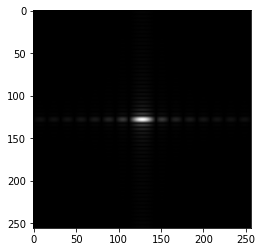

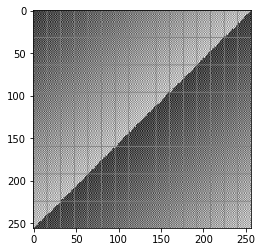

In [16]:
F = np.fft.fft2(img)
F_shifted = np.fft.fftshift(F)
magnitude = np.abs(F_shifted)
phase = np.angle(F_shifted)

plt.figure(1)
plt.imshow(magnitude,cmap='gray')
plt.figure(2)
plt.imshow(phase,cmap='gray')

Wie verändert sich das Fourierspektrum, wenn das Rechteck nicht mehr vertikal, sondern horizontal im Bild ausgerichtet ist?

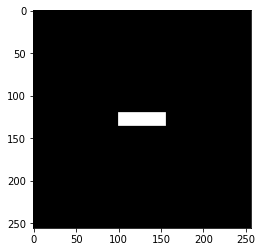

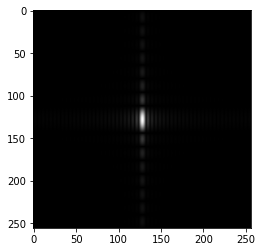

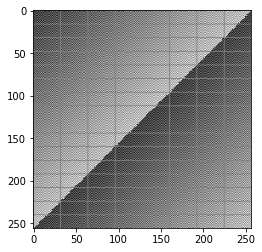

In [33]:
img = np.zeros((256,256))
img[120:-120,100:-100]=1

plt.figure(1)
plt.imshow(img, cmap='gray', vmin=0, vmax=1)

F = np.fft.fft2(img)
F_shifted = np.fft.fftshift(F)
magnitude = np.abs(F_shifted)
phase = np.angle(F_shifted)

plt.figure(2)
plt.imshow(magnitude,cmap='gray')
plt.figure(3)
plt.imshow(phase,cmap='gray')

Wie verändert sich das Fourierspektrum, wenn das Rechteck um jeweils 50 Pixel nach unten und nach rechts verschoben wird?

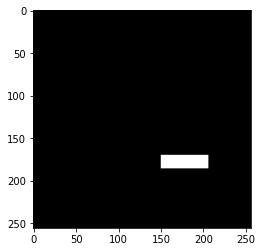

In [31]:
img = np.zeros((256,256))
img[50+120:50+-120,50+100:50+-100]=1

plt.figure(1)
plt.imshow(img, cmap='gray', vmin=0, vmax=1)

F = np.fft.fft2(img)
F_shifted = np.fft.fftshift(F)
magnitude = np.abs(F_shifted)
phase = np.angle(F_shifted)

plt.figure(2)
plt.imshow(magnitude,cmap='gray')
plt.figure(3)
plt.imshow(phase,cmap='gray')

Wie verändert sich das Fourierspektrum, wenn das Rechteck um 45 Grad gedreht wird? Nutzt dazu die Funktion `skimage.transform.rotate(img, angle)`.

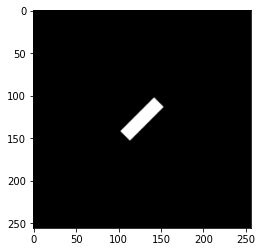

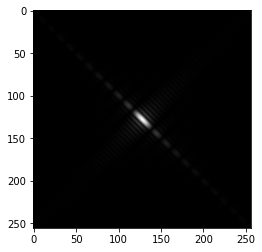

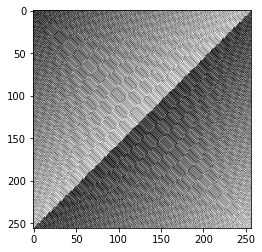

In [34]:
img = np.zeros((256,256))
img[120:-120,100:-100]=1

img = rotate(img, 45)

plt.figure(1)
plt.imshow(img, cmap='gray', vmin=0, vmax=1)

F = np.fft.fft2(img)
F_shifted = np.fft.fftshift(F)
magnitude = np.abs(F_shifted)
phase = np.angle(F_shifted)

plt.figure(2)
plt.imshow(magnitude,cmap='gray')
plt.figure(3)
plt.imshow(phase,cmap='gray')

Nun soll statt dem Rechteck ein Kreis mit Radius 5 auf dem Bild zu sehen sein. Wie wird das Fourierspektrum aussehen?


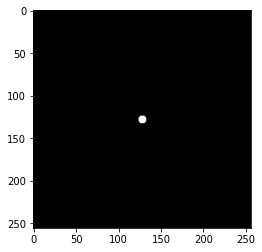

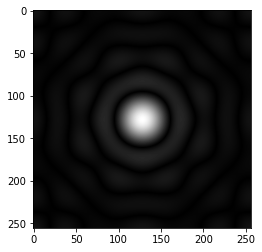

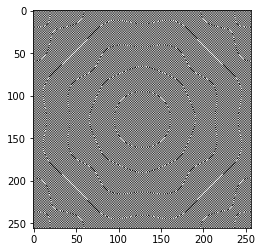

In [38]:
img = np.zeros((256,256))
for x in range(img.shape[0]):
  for y in range(img.shape[1]):
    if ((x-128)**2+(y-128)**2)**.5 < 5:
      img[x,y]=1

plt.figure(1)
plt.imshow(img, cmap='gray', vmin=0, vmax=1)

F = np.fft.fft2(img)
F_shifted = np.fft.fftshift(F)
magnitude = np.abs(F_shifted)
phase = np.angle(F_shifted)

plt.figure(2)
plt.imshow(magnitude,cmap='gray')
plt.figure(3)
plt.imshow(phase,cmap='gray')

Ändert den Radius des Kreises auf 2 und lasst zunächst einen Gauß-Filter mit `sigma=5` über das Bild laufen. Wie wird das Fourierspektrum aussehen?

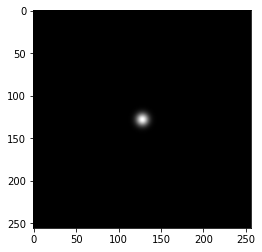

In [27]:
img = np.zeros((256,256))
for x in range(img.shape[0]):
  for y in range(img.shape[1]):
    if ((x-128)**2+(y-128)**2)**.5 < 2:
      img[x,y]=1

img = gaussian(img,sigma=5)

plt.figure(1)
plt.imshow(img, cmap='gray')

F = np.fft.fft2(img)
F_shifted = np.fft.fftshift(F)
magnitude = np.abs(F_shifted)
phase = np.angle(F_shifted)

plt.figure(2)
plt.imshow(magnitude,cmap='gray')
plt.figure(3)
plt.imshow(phase,cmap='gray')